In [5]:
from pandas import DataFrame, Series
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker as mticker
import mplfinance as mpf
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY,YEARLY
from matplotlib.dates import MonthLocator,MONTHLY
import datetime as dt
import pylab
import time

In [6]:
daytime = time.strftime("%Y.%m.%d", time.localtime()) 
#dfAll = pd.read_csv('industrystock'+daytime+'.csv')
dfAll = pd.read_csv('stock'+daytime+'shK.csv')
#dfAll = pd.read_csv('stock'+daytime+'shK.csv')
dfAll.head()

,日期,开盘价,收盘价,最高价,最低价,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,股票编号
0,2019-11-08,27.60,30.44,33.13,26.96,262044,779698602.0,49.20,142.74,17.90,70.89,688166
1,2019-11-11,30.03,32.24,33.33,29.93,151579,483402594.0,11.17,5.91,1.80,41.01,688166
2,2019-11-12,31.43,28.04,31.43,27.89,110284,320441224.0,10.98,-13.03,-4.20,29.83,688166
3,2019-11-13,28.03,28.51,29.11,27.34,63258,180876042.0,6.31,1.68,0.47,17.11,688166
4,2019-11-14,28.03,28.41,30.33,27.69,62991,185045178.0,9.26,-0.35,-0.10,17.04,688166


In [7]:
#处理数据
dfAll.rename(columns = {
    '日期':'Date',
    '开盘价':'Open',
    '最高价':'High',
    '最低价':'Low',
    '收盘价':'Close',
    '成交量':'Volume'
},inplace=True)
length = len(dfAll)
# for i in range(0, length):
#     d = str(int(dfAll.loc[i][0]))
#     d = d[0:4]+"-"+d[4:6]+"-"+d[6:8]
#     dfAll.loc[i,"Date"]=d
dfAll['Date'] =pd.to_datetime(dfAll['Date'])
dfAll.head()

,Date,Open,Close,High,Low,Volume,成交额,振幅,涨跌幅,涨跌额,换手率,股票编号
0,2019-11-08,27.60,30.44,33.13,26.96,262044,779698602.0,49.20,142.74,17.90,70.89,688166
1,2019-11-11,30.03,32.24,33.33,29.93,151579,483402594.0,11.17,5.91,1.80,41.01,688166
2,2019-11-12,31.43,28.04,31.43,27.89,110284,320441224.0,10.98,-13.03,-4.20,29.83,688166
3,2019-11-13,28.03,28.51,29.11,27.34,63258,180876042.0,6.31,1.68,0.47,17.11,688166
4,2019-11-14,28.03,28.41,30.33,27.69,62991,185045178.0,9.26,-0.35,-0.10,17.04,688166


In [10]:
#classify = dfAll["行业编号"].unique()
classify = dfAll["股票编号"].unique()
print(classify)
industryid = 688166


[688166 688590 688488 600397 600463 603101 600250 600123 600476 603106
 603337 603958 603176 600866 605398 600706 605319 600847 600756 688173]


In [14]:
#days = dfAll[dfAll["行业编号"].isin([industryid])].reset_index(drop=True)
days = dfAll[dfAll["股票编号"].isin([industryid])].reset_index(drop=True)
days

In [23]:
#df = dfAll[dfAll["行业编号"].isin([industryid])]
df = dfAll[dfAll["股票编号"].isin([industryid])]
#df.set_index('Date',inplace=True,drop=True)
df = df.tail(100).reset_index(drop=True)
df

,Date,Open,Close,High,Low,Volume,成交额,振幅,涨跌幅,涨跌额,换手率,股票编号
0,2021-08-25,34.83,36.70,36.88,34.54,46290,166439239.0,6.89,8.04,2.73,2.56,688166
1,2021-08-26,36.92,34.85,37.43,34.71,26827,95350874.0,7.41,-5.04,-1.85,1.49,688166
2,2021-08-27,34.88,33.85,35.25,33.60,16867,57862713.0,4.73,-2.87,-1.00,0.93,688166
3,2021-08-30,34.20,33.13,34.42,32.95,21025,70517431.0,4.34,-2.13,-0.72,1.16,688166
4,2021-08-31,33.25,33.66,34.34,32.71,22583,75591319.0,4.92,1.60,0.53,1.25,688166
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-01-17,33.66,34.28,36.16,33.31,67306,233011668.0,8.46,1.72,0.58,3.19,688166
96,2022-01-18,34.50,32.75,34.55,32.70,40082,133509309.0,5.40,-4.46,-1.53,1.90,688166
97,2022-01-19,32.90,32.56,33.30,31.92,18415,59833142.0,4.21,-0.58,-0.19,0.87,688166
98,2022-01-20,32.79,31.90,33.11,31.83,14413,46394454.0,3.93,-2.03,-0.66,0.68,688166


In [24]:
df.loc[0]['Close']

36.7

In [25]:
# #初始值
# DIFF=0
# DEA=0
# MACD=0
# EMA12=收盘价
# EMA26=收盘价

In [26]:
# #过程值
# EMA12=昨日EMA12*11/13+收盘价*2/12
# EMA26=昨日EMA26*25/27+收盘价*2/27
# DIF=EMA12-EMA26
# DEA = 昨日DEA*8/10+DiF*2/10
# BAR = 2(DIF-DEA)

In [27]:
df.insert(7,"EMA", 0, allow_duplicates=False)
df.insert(8,"DEA", 0, allow_duplicates=False)
df.insert(9,"DIF", 0, allow_duplicates=False)
df.insert(10,"MACD", 0, allow_duplicates=False)
df

,Date,Open,Close,High,Low,Volume,成交额,EMA,DEA,DIF,MACD,振幅,涨跌幅,涨跌额,换手率,股票编号
0,2021-08-25,34.83,36.70,36.88,34.54,46290,166439239.0,0,0,0,0,6.89,8.04,2.73,2.56,688166
1,2021-08-26,36.92,34.85,37.43,34.71,26827,95350874.0,0,0,0,0,7.41,-5.04,-1.85,1.49,688166
2,2021-08-27,34.88,33.85,35.25,33.60,16867,57862713.0,0,0,0,0,4.73,-2.87,-1.00,0.93,688166
3,2021-08-30,34.20,33.13,34.42,32.95,21025,70517431.0,0,0,0,0,4.34,-2.13,-0.72,1.16,688166
4,2021-08-31,33.25,33.66,34.34,32.71,22583,75591319.0,0,0,0,0,4.92,1.60,0.53,1.25,688166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-01-17,33.66,34.28,36.16,33.31,67306,233011668.0,0,0,0,0,8.46,1.72,0.58,3.19,688166
96,2022-01-18,34.50,32.75,34.55,32.70,40082,133509309.0,0,0,0,0,5.40,-4.46,-1.53,1.90,688166
97,2022-01-19,32.90,32.56,33.30,31.92,18415,59833142.0,0,0,0,0,4.21,-0.58,-0.19,0.87,688166
98,2022-01-20,32.79,31.90,33.11,31.83,14413,46394454.0,0,0,0,0,3.93,-2.03,-0.66,0.68,688166


In [28]:
def calEMA(df, term):
    for i in range(len(df)):
        if i==0: # 第一天
            df.loc[i,'EMA']=df.loc[i,'Close']
        if i>0:
            df.loc[i,'EMA']=(term-1)/(term+1)*df.loc[i-1,'EMA']+2/(term+1) * df.loc[i,'Close']
    EMAList=list(df['EMA'])
    return EMAList


In [29]:
def calMACD(df, shortTerm=12, longTerm=26, DIFTerm=9):
    shortEMA = calEMA(df, shortTerm)
    longEMA = calEMA(df, longTerm)
    df['DIF'] = pd.Series(shortEMA) - pd.Series(longEMA)
    for i in range(len(df)):
        if i==0:         # 第一天
            df.loc[i,'DEA'] = df.loc[i,'DIF']  # ix可以通过标签名和索引来获取数据
        if i>0:
            df.loc[i,'DEA'] = (DIFTerm-1)/(DIFTerm+1)*df.loc[i-1,'DEA'] + 2/(DIFTerm+1)*df.loc[i,'DIF']
    df['MACD'] = 2*(df['DIF'] - df['DEA'])
    return df[['Date','DIF','DEA','MACD']]
    # return df


In [30]:
stockDataFrame = calMACD(df, 12, 26, 9)
stockDataFrame.set_index("Date",inplace=True,drop=False)

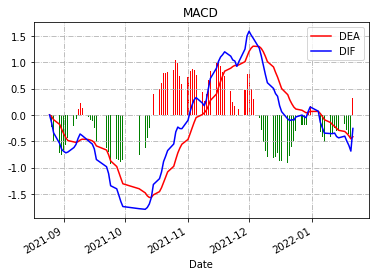

In [31]:
# 开始绘图
plt.figure()
stockDataFrame['DEA'].plot(color="red",label='DEA')
stockDataFrame['DIF'].plot(color="blue",label='DIF')
plt.legend(loc='best')    # 绘制图例
# 设置MACD柱状图
for index, row in stockDataFrame.iterrows():
    if(row['MACD'] >0):   # 大于0则用红色
        plt.bar(row['Date'], row['MACD'],width=0.5, color='red')
    else:                               # 小于等于0则用绿色
        plt.bar(row['Date'], row['MACD'],width=0.5, color='green')
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# 带网格线，且设置了网格样式
plt.grid(linestyle='-.')
plt.title("MACD")
plt.rcParams['axes.unicode_minus'] = False
plt.show()
